## King County House Price Prediction

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import datetime

In [150]:
house_df = pd.read_csv('./data/kc_house_data.csv')

In [151]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [152]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [153]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [154]:
#Conversion to datetime
house_df['date'] = pd.to_datetime(house_df['date'], format='%m/%d/%Y')
house_df['yr_built'] = pd.to_datetime(house_df['yr_built']).dt.strftime('%Y')
house_df['yr_renovated'] = pd.to_datetime(house_df['yr_renovated']).dt.strftime('%Y')

In [155]:
# dropping id and zip code columns 
house_df = house_df.drop('id', axis=1).drop('zipcode', axis=1)

### Exploratory Data Analysis

#### Target Variable: Price feature

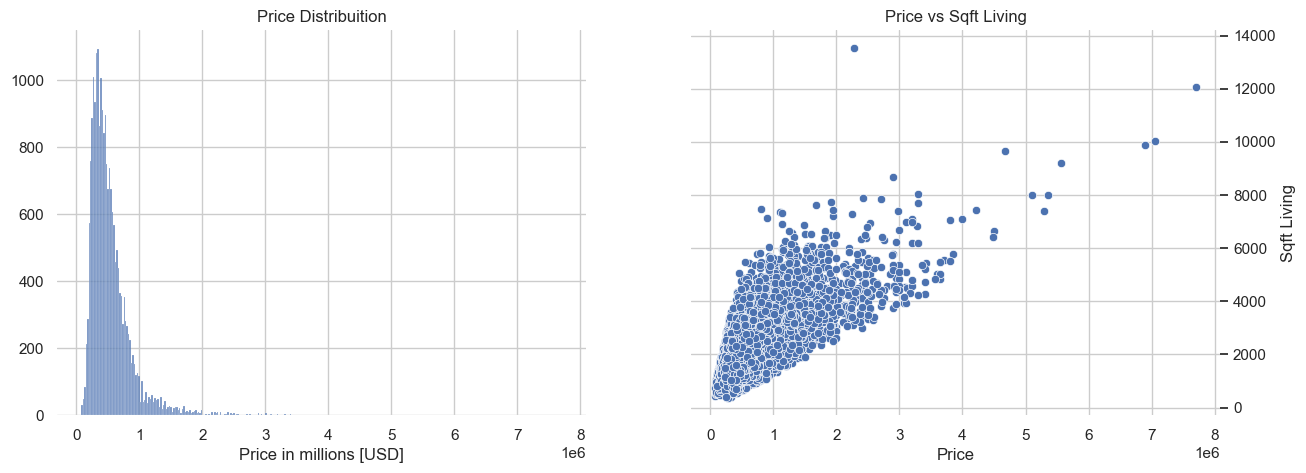

In [156]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.histplot(house_df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=house_df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

#### Floor and Bedroom Box Plots

[Text(0.5, 0, 'Nr of Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

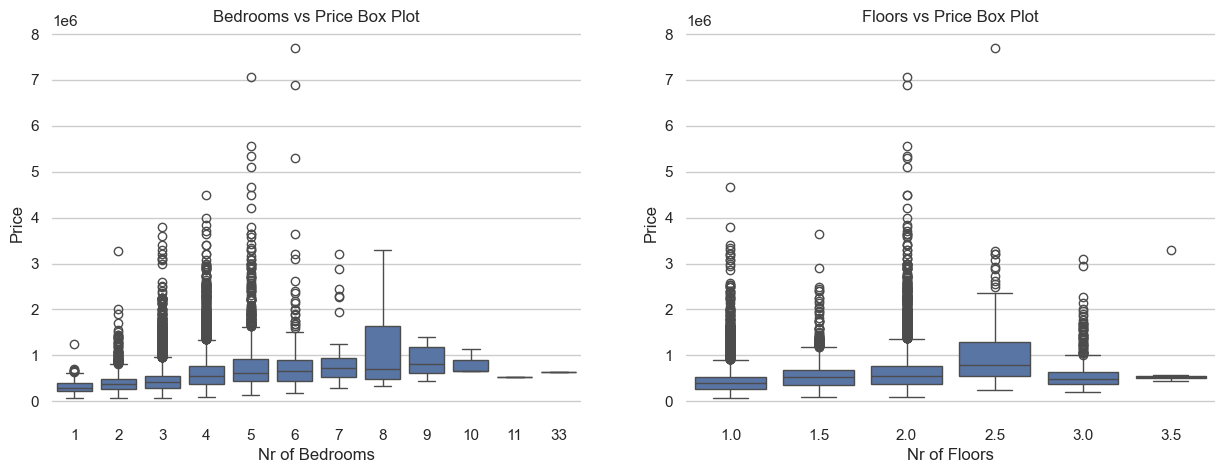

In [157]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['bedrooms'],y=house_df['price'], ax=axes[0])
sns.boxplot(x=house_df['floors'],y=house_df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Nr of Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Nr of Floors', ylabel='Price', title='Floors vs Price Box Plot')

#### Waterfront, View, and grade box plots

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

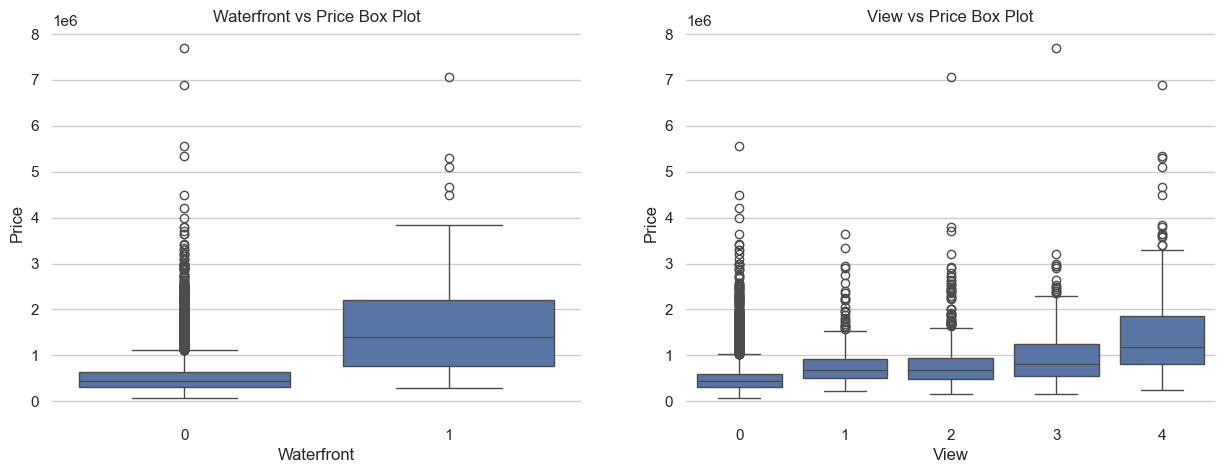

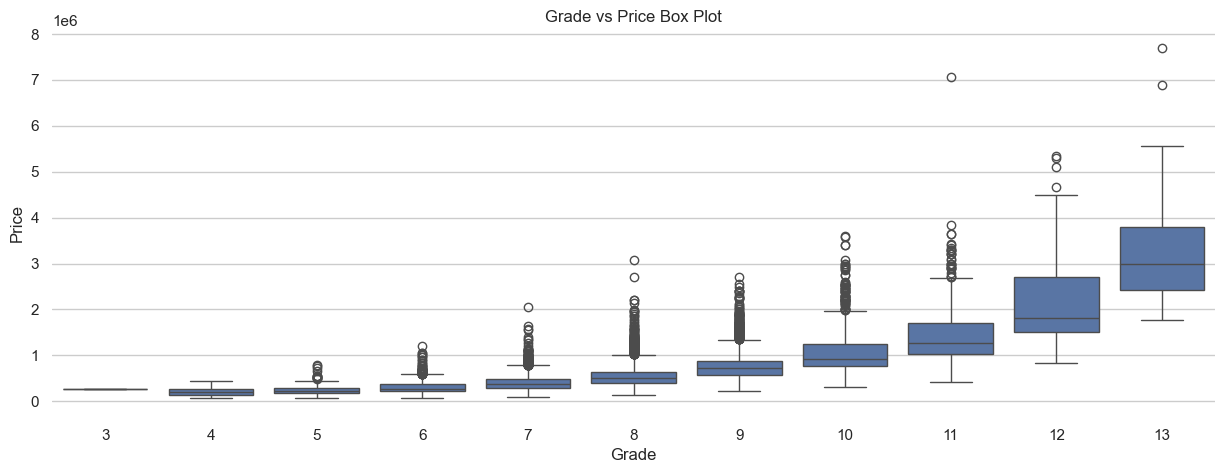

In [158]:
d, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['waterfront'],y=house_df['price'], ax=axes[0])
sns.boxplot(x=house_df['view'],y=house_df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

d, axes = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=house_df['grade'],y=house_df['price'], ax=axes)
sns.despine(left=True, bottom=True)
axes.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

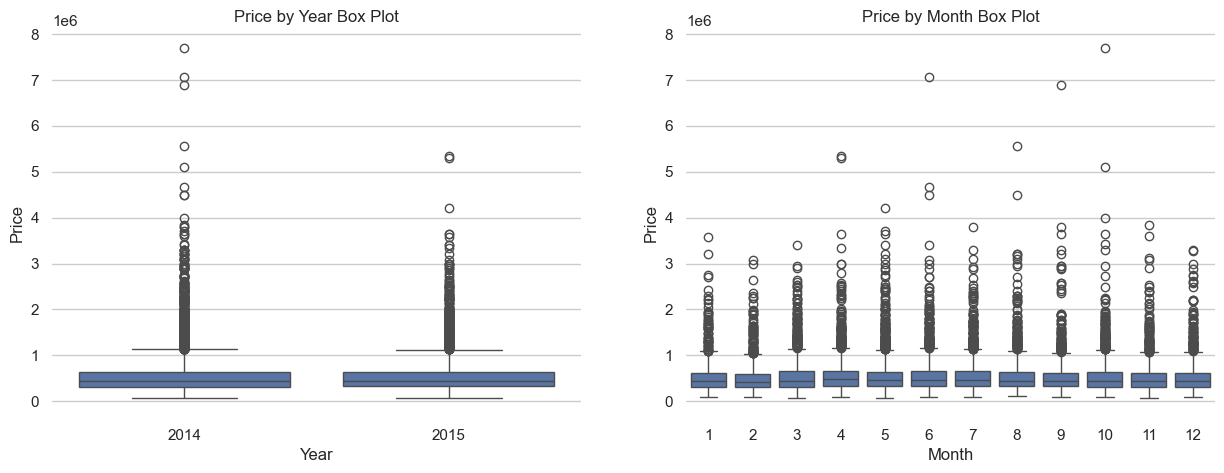

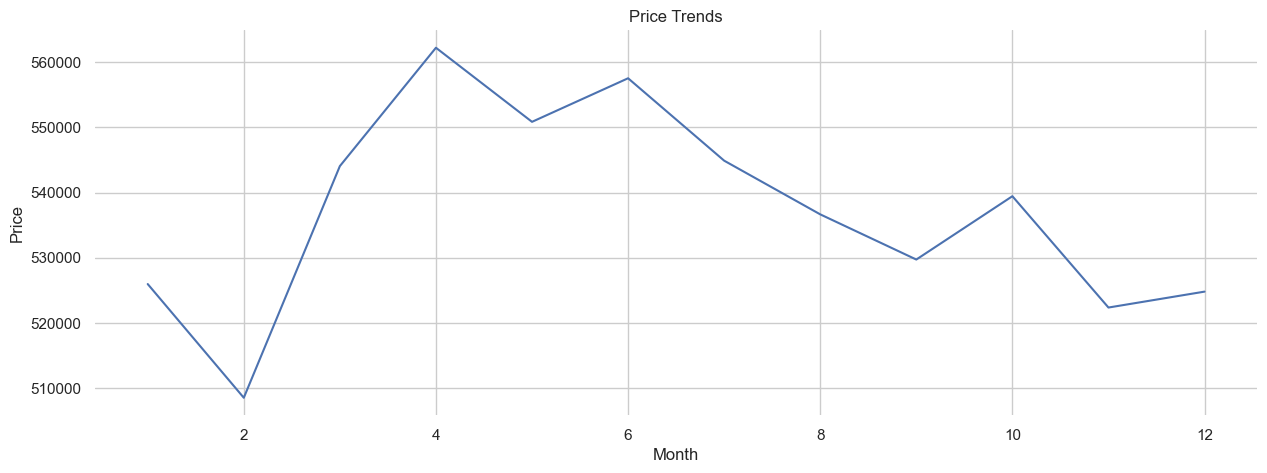

In [159]:
house_df['month'] = house_df['date'].apply(lambda date:date.month)
house_df['year'] = house_df['date'].apply(lambda date:date.year)

d, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=house_df, ax=axes[0])
sns.boxplot(x='month',y='price',data=house_df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

d, axe = plt.subplots(1, 1,figsize=(15,5))
house_df.groupby(['month']).mean(numeric_only=True)['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')


In [160]:
X = house_df.drop('price',axis=1)

# Label
y = house_df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)